In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [47]:
nls_data= np.loadtxt('nls_data.txt')

In [48]:
nls_data.shape

(100, 2)

In [49]:
nls_data[1:10,]

array([[  2.311,  18.015],
       [  6.068,  34.638],
       [  4.86 ,  28.423],
       [  8.913,  52.197],
       [  7.621,  43.323],
       [  4.565,  27.309],
       [  0.185,  11.319],
       [  8.214,  47.461],
       [  4.447,  26.839]])

In [50]:
x=nls_data[:,0]
y=nls_data[:,1]

In [51]:
x=x.reshape((-1,1))
# x.shape
y=y.reshape((-1,1))

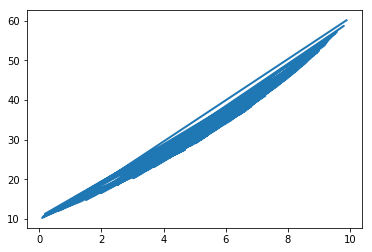

In [52]:
plt.plot(x, y, linewidth=2.0)
plt.show()

In [53]:
# np.ones(y.shape)

In [54]:
y.shape

(100, 1)

# a

Find the best linear fit to the data, assuming a form z = ax + b. This is a least-squares problem of the
form unknowns a, b: Minimize
100
(z i − ax i − b) 2 = (z − ax − b1) T (z − ax − b1) = (z − A
i=1
where A = x
a T
a
) (z − A
)
b
b
1 , 1 is the vector of all 1s. Setting the gradient equal to 0 gives:
A T A
a
b
= A T z
In MATLAB, one solves linear equations Ax = b as x = A\b. Solve for the optimal values of a, b.

In [55]:
A=np.concatenate(( np.ones(y.shape),x), axis=1)

solution = np.linalg.solve(np.dot(A.T, A), np.dot(A.T, y))

In [56]:
# np.dot(A.T, A)

In [57]:
solution

array([[ 6.4407104 ],
       [ 4.94821273]])

In [58]:
solution.shape

(2, 1)

## optimal a=4.94821273, b=6.4407104 since a, b are the coefficents of x and 1

# b

Find the error e = z − A(a,b) and compute the error in the fit e T e

In [59]:
e=y-np.dot(A, solution)
# np.dot(e.T, e)
print('squared error is'+ str(np.dot(e.T, e)))

squared error is[[ 315.61362162]]


## the squared error in the fit is 315.61362162

# c

In [60]:
A=np.concatenate(( np.ones(y.shape),x,x**2), axis=1)

solution = np.linalg.solve(np.dot(A.T, A), np.dot(A.T, y))
print('coefficents are')
print(solution)
e=y-np.dot(A, solution)
print('squared error is'+ str(np.dot(e.T, e)))

coefficents are
[[ 10.84087371]
 [  2.46637377]
 [  0.24353659]]
squared error is[[ 12.96553533]]


# d

In [61]:
A=np.concatenate(( np.ones(y.shape),x,x**2,x**3), axis=1)

solution = np.linalg.solve(np.dot(A.T, A), np.dot(A.T, y))
print('coefficents are')
print(solution)
e=y-np.dot(A, solution)
print('squared error is'+ str(np.dot(e.T, e)))

coefficents are
[[ 10.22796758]
 [  3.20317649]
 [  0.05674414]
 [  0.01264405]]
squared error is[[ 7.34031963]]


# e

In [62]:
A=np.concatenate(( np.ones(y.shape),x,x**2,x**3,x**4), axis=1)

solution = np.linalg.solve(np.dot(A.T, A), np.dot(A.T, y))
print('coefficents are')
print(solution)
e=y-np.dot(A, solution)
print('squared error is'+ str(np.dot(e.T, e)))

coefficents are
[[  1.02623793e+01]
 [  3.12225212e+00]
 [  9.48486391e-02]
 [  6.57332330e-03]
 [  3.09101349e-04]]
squared error is[[ 7.31881618]]


# f

In [63]:
A=np.concatenate(( np.ones(y.shape),x), axis=1)

solution = np.linalg.solve(np.dot(A.T, A), np.dot(A.T, np.log(y)))
solution

array([[ 2.48575132],
       [ 0.16908878]])

## optimal a=0.16908878, b=2.48575132 since a, b are the coefficents of x and 1

# g

In [64]:
ee=np.log(y)-np.dot(A, solution)
np.dot(ee.T, ee)

array([[ 0.23199561]])

In [65]:
e=y-np.exp(np.dot(A, solution))
# np.dot(e.T, e)
print('squared error is'+ str(np.dot(e.T, e)))

squared error is[[ 191.55933517]]


# h

## (4th order polynomial) quartic is the best since squared error is the smallest